In [4]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython
import pickle
np.random.seed(42)
import itertools


In [5]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import delta_function, transform_pd

from utils import viz as viz_utils

from agent import Person

from model import TaxFraudModel


In [19]:
def read_in(name):
    with open( name, "rb") as f:
        five = pickle.load(f) 
    return five


In [4]:
# names = ['df_s_hist.pkl_None_hist_GT.pkl', 'df_s_hist.pkl_appeal_hist_None.pkl']
data = []
clf = ['hist', 'uni', 'is1', 'is2', 'is3', 'is4']
dec = ['', '_dec']
appeal = ['appeal', 'None']
aeval = ['GT', 'None']
star = ['hist', 'uniform', 'is1', 'is2', 'is3', 'is4']


for idx,i in enumerate(clf):
    for j in dec:
        for a in appeal:
            for ae in aeval:
                dfname = 'df_s_' + i + j +'.pkl_'+ a + '_' + star[idx] +'_' + ae + '.pkl'
                temp_df = transform_pd(read_in(dfname))
                temp_df.name = dfname
                data.append(temp_df)
                    


data[1]



/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])
/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline['intersect'] = list(df_baseline['gender'])
/Users/uni/Documents/Git/abm/basic/utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         1      1    0.543584  0.37454         0.0      0     0       1   
                 2    0.573133  0.37454         0.0      0     0       1   
                 3    0.605981  0.37454         0.0      0     0       1   
                 4    0.642702  0.37454         0.0      0     0       1   
                 5    0.684009  0.37454         0.0      1     0       1   
...                        ...      ...         ...    ...   ...     ...   
19        1000   146  0.000000  0.37454         1.0      1     0       1   
                 147  0.000000  0.37454         1.0      1     0       1   
                 148  0.000000  0.37454         1.0      1     0       1   
                 149  0.000000  0.37454         1.0      1     0       1   
                 150  0.000000  0.37454         1.0      1     0       1   

                      convicted  eod_gender  eod_race  dpd_gender  dpd_race  \
iteration obj_id t                                                            
0         1      1            0    0.924061  0.941604    0.997098  0.995549   
                 2            0    0.846851  0.881983    0.901991  0.924123   
                 3            0    0.798984  0.873468    0.866101  0.851088   
                 4            0    0.743735  0.865584    0.897706  0.828491   
                 5            0    0.843069  0.730594    0.883627  0.888506   
...                         ...         ...       ...         ...       ...   
19        1000   146          1    0.728269  0.781618    0.776614  0.868753   
                 147          1    0.397569  0.758082    0.743340  0.986025   
                 148          1    0.438953  0.835045    0.756294  0.875231   
                 149          1    0.535526  0.891806    0.697513  0.850862   
                 150          1    0.871945  0.915436    0.814380  0.952696   

                      eval_acc  misclassifications intersect  
iteration obj_id t                                            
0         1      1       0.642                 0.0        mw  
                 2       0.669                 0.0        mw  
                 3       0.653                 0.0        mw  
                 4       0.687                 0.0        mw  
                 5       0.689                -1.0        mw  
...                        ...                 ...       ...  
19        1000   146     0.780                 0.0        mw  
                 147     0.763                 0.0        mw  
                 148     0.774                 0.0        mw  
                 149     0.769                 0.0        mw  
                 150     0.785                 0.0        mw  

[3000000 rows x 14 columns]

In [34]:
dfnames = ['dfs_a_ngt.pkl', 'dfs_a_gt.pkl'] #df_None_appeal_uniform_GT.pkl', 'df_None_appeal_uniform_None.pkl', 'df_None_None_uniform_GT.pkl', 'df_None_None_uniform_None.pkl']
data = []
for dfname in dfnames:
    temp_df = (read_in(dfname))
    print(temp_df)
    temp_df = temp_df[0]
    temp_df.name = dfname
    data.append(temp_df)



[                        wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         1      1    0.115957  0.37454         1.0    1.0     0       1   
                 2    0.066392  0.37454         1.0    1.0     0       1   
                 3    0.066832  0.37454         0.0    1.0     0       1   
                 4    0.067279  0.37454         0.0    1.0     0       1   
                 5    0.067732  0.37454         0.0    0.0     0       1   
...                        ...      ...         ...    ...   ...     ...   
19        1000   146  0.000000  0.37454         0.0    1.0     0       0   
                 147  0.000000  0.37454         1.0    0.0     0       0   
                 148  0.000000  0.37454         1.0    0.0     0       0   
                 149  0.000000  0.37454         0.0    0.0     0       0   
                 150  0.000000  0.37454         0.0    0.0     0       0   

          

## Visualization

In [16]:
def viz2(data, y):
    num_rows = np.ceil(len(data)/4).astype(int)
    num_cols = 4  # You can change this if you want more columns

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))
    

    for i, ax in zip(data, axes.flat):
        sns.lineplot(data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    ax = ax,
                    marker = 'o')
    
    # plt.ylim(0,0.2)
    
    # plt.xlim(0,50)
    plt.tight_layout()
    plt.show()

def viz(data, y, hue, title = None):
    num_rows = np.ceil(len(data)/4).astype(int)
    num_cols = 4  # You can change this if you want more columns

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))
    # fig = plt.figure(figsize=(10,60))
    no = 0
    for i, ax in (zip(data, axes.flat)):
        print(ax)
        
        # no +=1
        sns.lineplot(ax = ax,
                    data = i,
                    x = i.index.get_level_values('t'),
                    y = i[y],
                    hue = hue,
                    marker = 'o')
    
        # ax.set_title(f'Subplot {i + 1}')
        # ax.set_xlim(0, 50)  # You can adjust the x-axis limits here
        ax.legend()

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()


    plt.show()

In [31]:
sns.lineplot(   x =  data[0].index.get_level_values('t'),
                y = data[0]['eval_acc'], label = 'appeal gt')
sns.lineplot(   x =  data[1].index.get_level_values('t'),
                y = data[1]['eval_acc'], label = 'appeal')

sns.lineplot(   x =  data[2].index.get_level_values('t'),
                y = data[2]['eval_acc'], label = 'no appeal gt')
sns.lineplot(   x =  data[3].index.get_level_values('t'),
                y = data[3]['eval_acc'], label = 'no appeal')

AttributeError: 'builtin_function_or_method' object has no attribute 'get_level_values'

IndexError: list index out of range

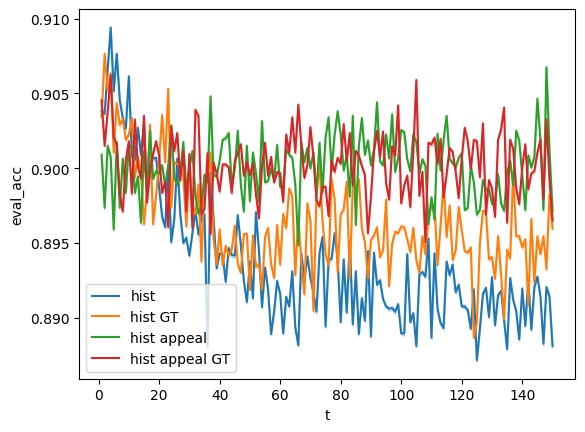

In [10]:
sns.lineplot(   x =  data[0].index.get_level_values('t'),
                y = data[0]['eval_acc'], label = 'hist')
sns.lineplot(   x =  data[1].index.get_level_values('t'),
                y = data[1]['eval_acc'], label = 'hist GT')
sns.lineplot(   x =  data[2].index.get_level_values('t'),
                y = data[2]['eval_acc'], label = 'hist appeal')
sns.lineplot(   x =  data[3].index.get_level_values('t'),
                y = data[3]['eval_acc'], label = 'hist appeal GT')
sns.lineplot(   x =  data[4].index.get_level_values('t'),
                y = data[4]['eval_acc'], label = 'hist')
sns.lineplot(   x =  data[5].index.get_level_values('t'),
                y = data[5]['eval_acc'], label = 'hist GT')
sns.lineplot(   x =  data[6].index.get_level_values('t'),
                y = data[6]['eval_acc'], label = 'hist appeal')
sns.lineplot(   x =  data[7].index.get_level_values('t'),
                y = data[7]['eval_acc'], label = 'hist appeal GT')

AxesSubplot(0.125,0.11;0.168478x0.77)
AxesSubplot(0.327174,0.11;0.168478x0.77)
AxesSubplot(0.529348,0.11;0.168478x0.77)
AxesSubplot(0.731522,0.11;0.168478x0.77)


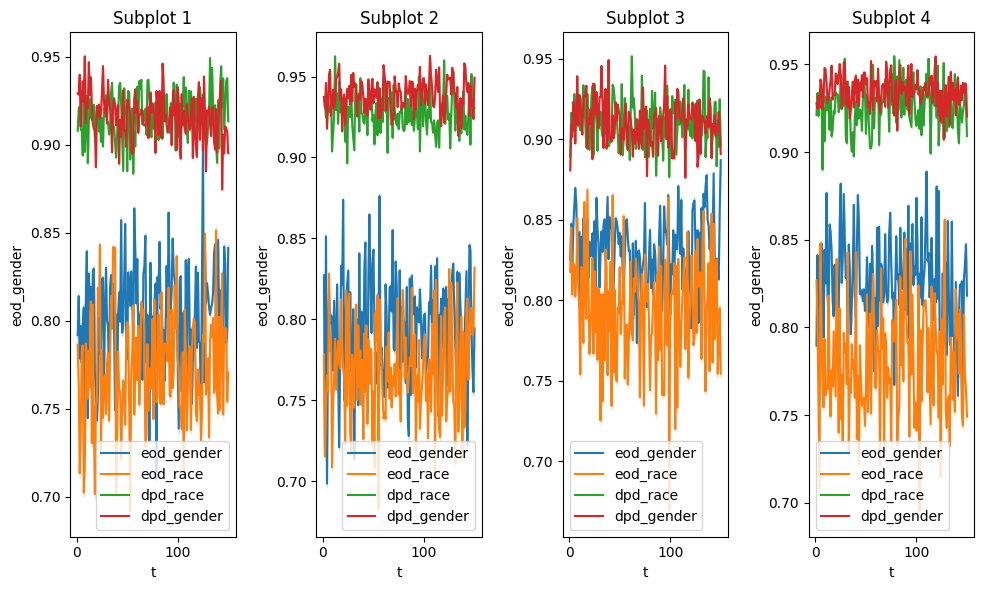

In [11]:
def viz_fairness(data_list):
    num_rows = np.ceil(len(data_list)/4).astype(int)
    num_cols = 4  # You can change this if you want more columns

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows))

    # Loop through data_list and plot on subplots
    for i, ax in enumerate(axes.flat):
        print(ax)
        sns.lineplot(x=data_list[i].index.get_level_values('t'),
                    y=data_list[i]['eod_gender'], label='eod_gender', ax=ax)

        sns.lineplot(x=data_list[i].index.get_level_values('t'),
                    y=data_list[i]['eod_race'], label='eod_race', ax=ax)

        sns.lineplot(x=data_list[i].index.get_level_values('t'),
                    y=data_list[i]['dpd_race'], label='dpd_race', ax=ax)

        sns.lineplot(x=data_list[i].index.get_level_values('t'),
                    y=data_list[i]['dpd_gender'], label='dpd_gender', ax=ax)

        ax.set_title(f'Subplot {i + 1}')
        # ax.set_xlim(0, 50)  # You can adjust the x-axis limits here
        ax.legend()

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

viz_fairness(data)

In [ ]:
# fig, axes = plt.subplots(2,2)

# for i, ax in zip(data, axes.flat):
#     sns.histplot(i['intersect'], ax = ax)
#     # # plt.ylim(0,0.2)
#     # plt.xlim(0,50)

# plt.show()



AttributeError: 'builtin_function_or_method' object has no attribute 'get_level_values'

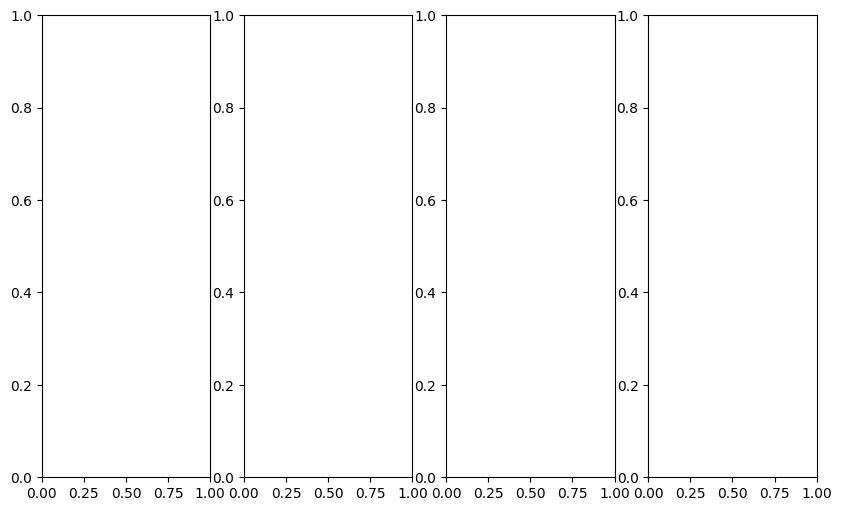

In [30]:
viz2(data, 'wealth')
viz2(data, 'fraud')
viz2(data, 'fraud_pred')

AxesSubplot(0.125,0.11;0.168478x0.77)
AxesSubplot(0.327174,0.11;0.168478x0.77)
AxesSubplot(0.529348,0.11;0.168478x0.77)
AxesSubplot(0.731522,0.11;0.168478x0.77)


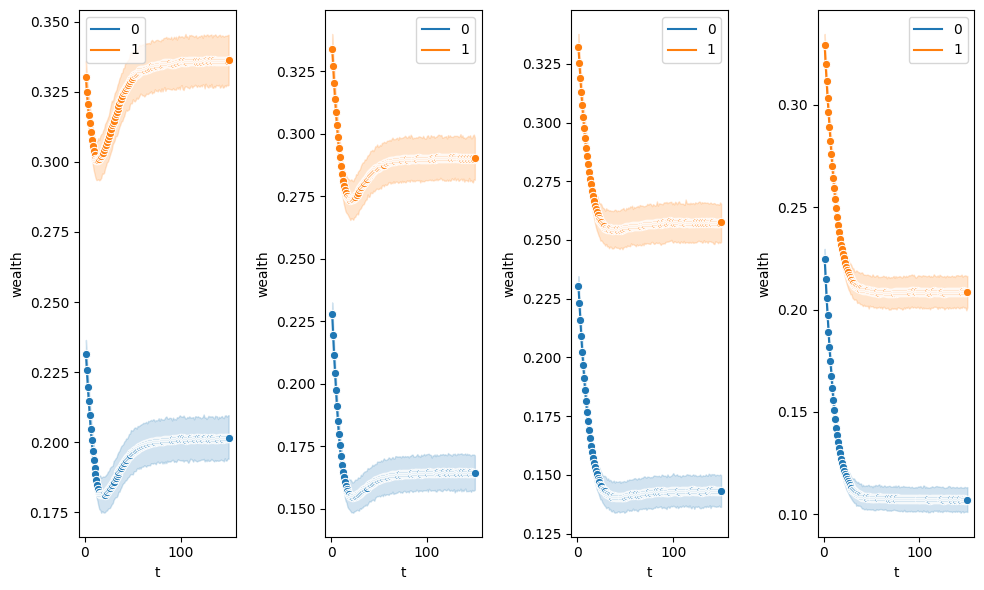

AxesSubplot(0.125,0.11;0.168478x0.77)
AxesSubplot(0.327174,0.11;0.168478x0.77)
AxesSubplot(0.529348,0.11;0.168478x0.77)
AxesSubplot(0.731522,0.11;0.168478x0.77)


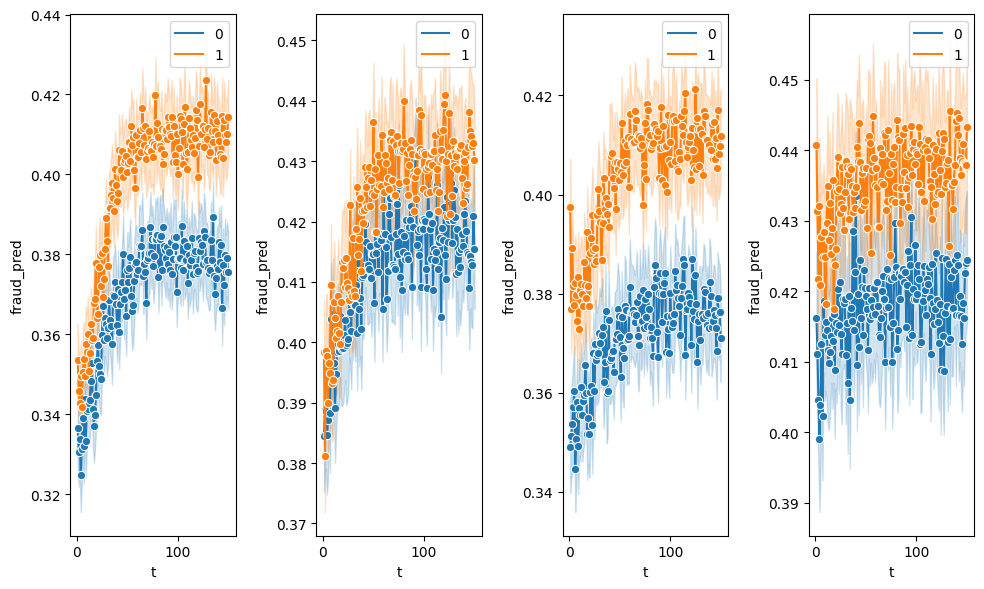

AxesSubplot(0.125,0.11;0.168478x0.77)
AxesSubplot(0.327174,0.11;0.168478x0.77)
AxesSubplot(0.529348,0.11;0.168478x0.77)
AxesSubplot(0.731522,0.11;0.168478x0.77)


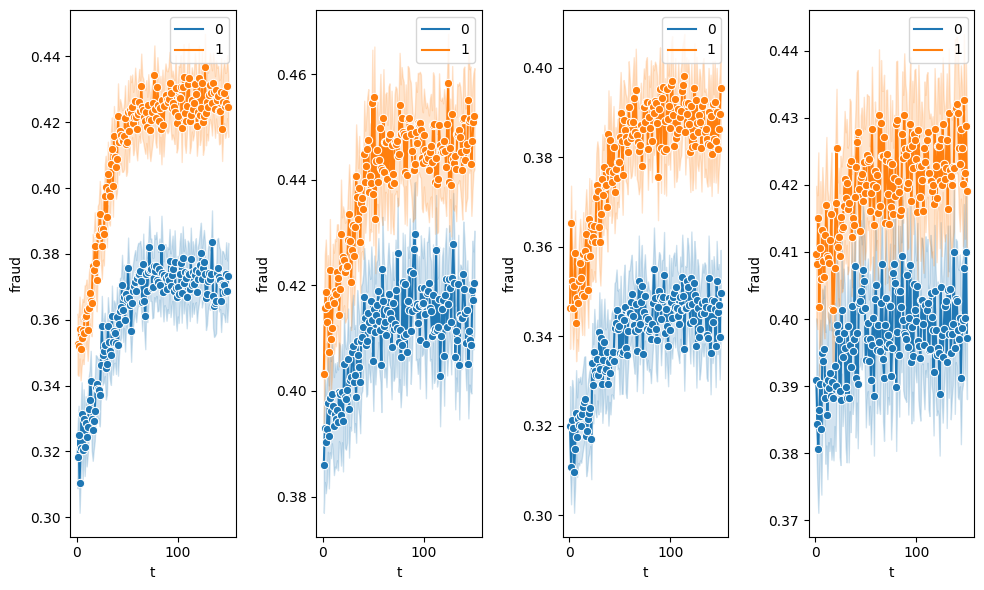

In [13]:
viz(data, 'wealth', 'gender')
viz(data, 'fraud_pred', 'gender')
viz(data, 'fraud', 'gender')


AxesSubplot(0.125,0.11;0.168478x0.77)


AttributeError: 'builtin_function_or_method' object has no attribute 'get_level_values'

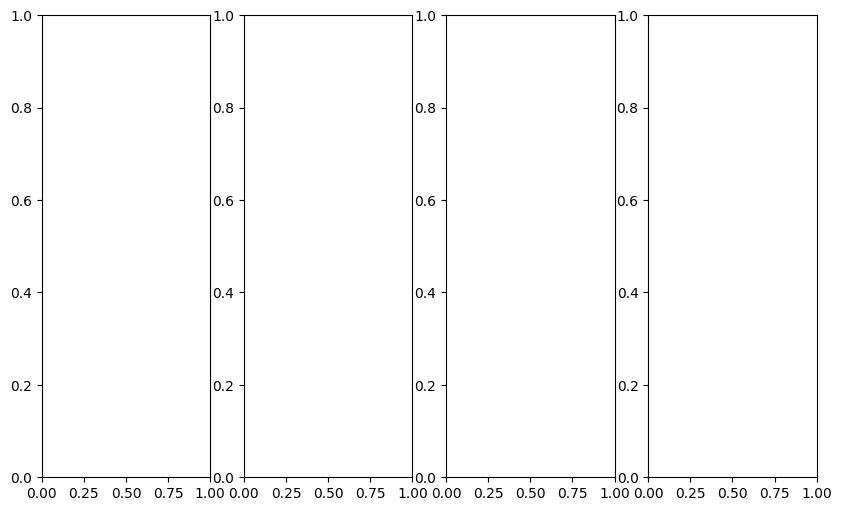

In [29]:
# viz(data, 'wealth', 'race')
# viz(data, 'fraud_pred', 'race')
# viz(data, 'fraud', 'race')



# viz(data, 'wealth', 'misclassifications')
# viz(data, 'gender', 'misclassifications')
# viz(data, 'race', 'misclassifications')

viz(data, 'wealth', 'intersect')
viz(data, 'fraud_pred', 'intersect')
viz(data, 'fraud', 'intersect')



In [ ]:
# viz(df, df.index.get_level_values('t'), df['wealth'], abs(df['misclassifications']), title = 'Misclassification of Probabilistic Classifier ') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['wealth'], df['intersect'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])

# viz(df, df.index.get_level_values('t'), df['fraud'], df['race'], title= 'Probabilitic Classifier') #, df_baseline['convicted'])


# # viz(df_b, df.index.get_level_values('t'), df_b['wealth'], df_b['fraud'],title= 'Probabilitic Classifier') #, df_baseline['convicted'])
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['wealth']<0.1)
# viz2(df, df.index.get_level_values('t'), df['fraud'])
# viz2(df, df.index.get_level_values('t'), df['fraud_pred'])

In [ ]:
with open('all_dfs_combi.pkl', "rb") as f:
    dfs_gt, dfs_gt_na, dfs_gt_a, dfs_a, dfs_a_gt, dfs_a_gt, dfs_a_ngt,dfs_dec, dfs_dec_ngt, dfs_dec_gt, dfs_dec_na, dfs_dec_a = pickle.load(f) 

/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         7      1    0.226926  0.37454           0    1.0     1       0   
                 2    0.180056  0.37454           1    0.0     1       0   
                 3    0.183298  0.37454           0    0.0     1       0   
                 4    0.186658  0.37454           0    0.0     1       0   
                 5    0.190142  0.37454           0    1.0     1       0   
...                        ...      ...         ...    ...   ...     ...   
19        1000   146  0.893513  0.37454           1    1.0     0       1   
                 147  0.868829  0.37454           1    1.0     0       1   
                 148  0.843090  0.37454           1    0.0     0       1   
                 149  0.914170  0.37454           0    0.0     0       1   
                 150  0.997741  0.37454           0    0.0     0       1   

           

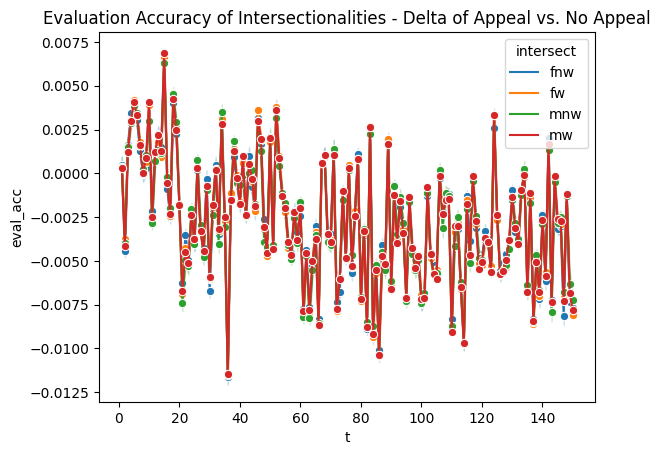

/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:74: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         7      1    0.037006  0.37454           0    1.0     1       0   
                 2   -0.000801  0.37454           1    0.0     1       0   
                 3    0.010715  0.37454           0    0.0     1       0   
                 4    0.021243  0.37454           0    0.0     1       0   
                 5    0.030939  0.37454           0    1.0     1       0   
...                        ...      ...         ...    ...   ...     ...   
19        1000   146  0.581627  0.37454           1    1.0     0       1   
                 147  0.556788  0.37454           1    1.0     0       1   
                 148  0.531104  0.37454           1    0.0     0       1   
                 149  0.602267  0.37454           0    0.0     0       1   
                 150  0.685622  0.37454           0    0.0     0       1   

           

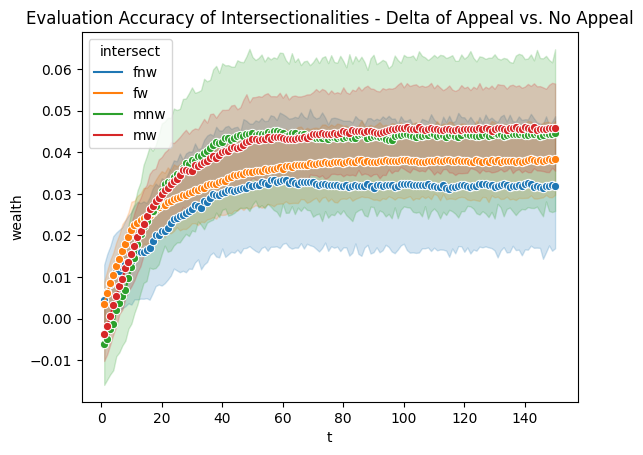

/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud  race  gender  \
iteration obj_id t                                                         
0         1      4    0.171635  0.37454           0    1.0     0       1   
                 7    0.207113  0.37454           0    1.0     0       1   
                 13   0.175265  0.37454           0    1.0     0       1   
                 22   0.002890  0.37454           0    1.0     0       1   
                 25  -0.086612  0.37454           0    1.0     0       1   
...                        ...      ...         ...    ...   ...     ...   
19        1000   130  0.565859  0.37454           1    0.0     0       1   
                 134  0.652394  0.37454           1    0.0     0       1   
                 137  0.670307  0.37454           1    0.0     0       1   
                 140  0.785302  0.37454           1    0.0     0       1   
                 148  0.644554  0.37454           1    0.0     0       1   

           

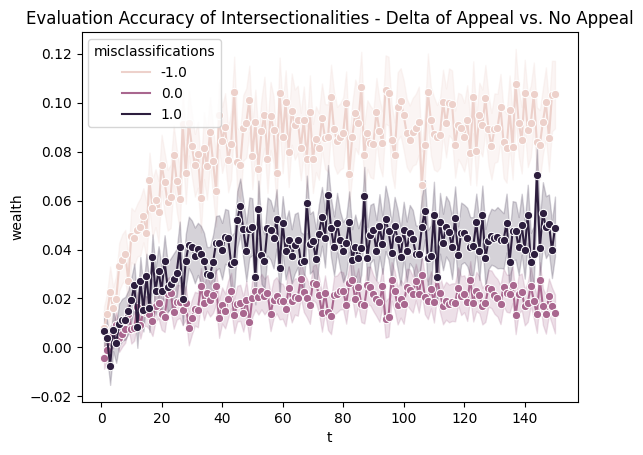

/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud  race    gender  \
iteration obj_id t                                                           
0         1      4    0.483969  0.37454           0    1.0     0  0.485594   
                 7    0.495707  0.37454           0    1.0     0  0.485184   
                 13   0.448904  0.37454           0    1.0     0  0.484614   
                 22   0.281107  0.37454           0    1.0     0  0.488420   
                 25   0.193532  0.37454           0    1.0     0  0.487912   
...                        ...      ...         ...    ...   ...       ...   
19        1000   130  0.767502  0.37454           1    0.0     0  0.507739   
                 134  0.844384  0.37454           1    0.0     0  0.496586   
                 137  0.867281  0.37454           1    0.0     0  0.495327   
                 140  0.981000  0.37454           1    0.0     0  0.499180   
                 148  0.843090  0.37454           1    0.0     0

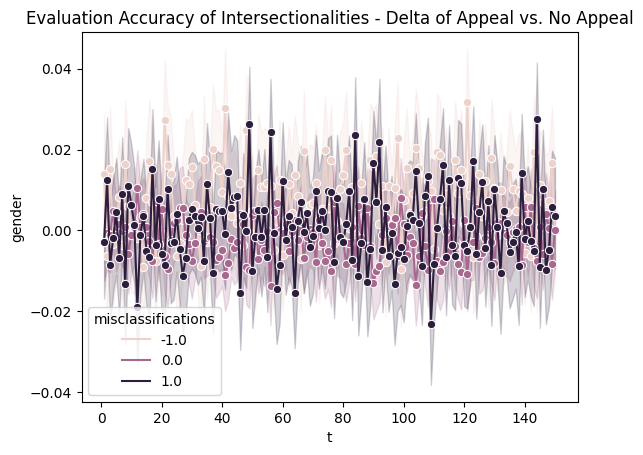

/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_wb1 = df.iloc[(df[disc_axis] == i).values][y_axis] - df_b1.groupby(level='t').mean()[y_axis]
/Users/uni/Documents/Git/abm/basic/utils.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x1[y_axis] = df_wb1
/Users/uni/Documents/Git/abm/basic/utils.py:84: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

                        wealth   health  fraud_pred  fraud      race  gender  \
iteration obj_id t                                                             
0         1      4    0.483969  0.37454           0    1.0 -0.198880       1   
                 7    0.495707  0.37454           0    1.0 -0.189451       1   
                 13   0.448904  0.37454           0    1.0 -0.198696       1   
                 22   0.281107  0.37454           0    1.0 -0.189588       1   
                 25   0.193532  0.37454           0    1.0 -0.194805       1   
...                        ...      ...         ...    ...       ...     ...   
19        1000   130  0.767502  0.37454           1    0.0 -0.209369       1   
                 134  0.844384  0.37454           1    0.0 -0.209601       1   
                 137  0.867281  0.37454           1    0.0 -0.203531       1   
                 140  0.981000  0.37454           1    0.0 -0.199795       1   
                 148  0.843090  0.37454 

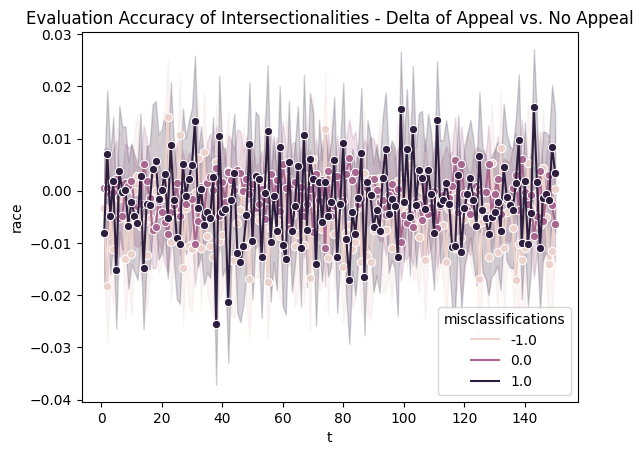

In [15]:
# df_xb = delta_function('intersect', 'wealth', data[6], data[4])
# # print(df_xb)
# viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'] )

# df_xb = delta_function('eval_acc', 'wealth', dfs_appeal[0], dfs_appeal[1])
# print(df_xb)
# viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['eval_acc'], plot_title = 'Evaluation Accuracy of Wealth - Delta of Appeal vs. No Appeal')

df =  data

df_xb = delta_function('intersect', 'eod_gender', df[0], df[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['eval_acc'].astype(float), df_xb['intersect'], plot_title = 'Evaluation Accuracy of Intersectionalities - Delta of Appeal vs. No Appeal')


df_xb = delta_function('intersect', 'wealth', df[0], df[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['intersect'], plot_title = 'Evaluation Accuracy of Intersectionalities - Delta of Appeal vs. No Appeal')



df_xb = delta_function('misclassifications', 'wealth', df[0], df[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['wealth'].astype(float), df_xb['misclassifications'], plot_title = 'Evaluation Accuracy of Intersectionalities - Delta of Appeal vs. No Appeal')



df_xb = delta_function('misclassifications', 'gender', df[0], df[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['gender'].astype(float), df_xb['misclassifications'], plot_title = 'Evaluation Accuracy of Intersectionalities - Delta of Appeal vs. No Appeal')


df_xb = delta_function('misclassifications', 'race', df[0], df[1])
print(df_xb)
viz_utils(df_xb, df_xb.index.get_level_values('t'), df_xb['race'].astype(float), df_xb['misclassifications'], plot_title = 'Evaluation Accuracy of Intersectionalities - Delta of Appeal vs. No Appeal')





In [ ]:
for df in all_dfs:
    sns.lineplot(   x =  dfs_appeal[0].index.get_level_values('t'),
                y = dfs_appeal[0]['eval_acc'], label = 'appeal')
    sns.lineplot(   x =  dfs_appeal[1].index.get_level_values('t'),
                    y = dfs_appeal[1]['eval_acc'], label = 'no appeal')


In [ ]:
fig, axes = plt.subplots(2,2)

for no, i in enumerate([mlp, proba]):
    ax = axes[no-1]
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_gender'], ax = ax)

    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['eod_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_race'])
    sns.lineplot(   x =  i.index.get_level_values('t'),
                    y = i['dpd_gender'])
    # # plt.ylim(0,0.2)
    # plt.xlim(0,50)

plt.show()



In [5]:
g_a_d = pd.DataFrame()
g_n_d = pd.DataFrame()
g_a_n = pd.DataFrame()
g_n_n = pd.DataFrame()

d_a_d = pd.DataFrame()
d_n_d = pd.DataFrame()
d_a_n = pd.DataFrame()
d_n_n = pd.DataFrame()

for df in data:
    if 'GT' in df.name:
        if 'appeal' in df.name:
            if 'dec' in df.name:
                g_a_d = pd.concat([g_a_d, df], axis=0)
            else:
                g_a_n = pd.concat([g_a_n, df], axis=0)
        else: 
            if 'dec' in df.name:
                g_n_d = pd.concat([g_n_d, df], axis=0)
            else:
                g_n_n = pd.concat([g_n_n, df], axis=0)

    else: 
        if 'appeal' in df.name:
            if 'dec' in df.name:
                d_a_d = pd.concat([d_a_d, df], axis=0)
            else:
                d_a_n = pd.concat([d_a_n, df], axis=0)
        else: 
            if 'dec' in df.name:
                d_n_d = pd.concat([d_n_d, df], axis=0)
            else:
                d_n_n = pd.concat([d_n_n, df], axis=0)

all_data = [g_a_d, g_a_n, g_n_d, g_n_n, d_a_d, d_a_n, d_n_d, d_n_n]

with open("all_data.pkl", "wb") as f:
    pickle.dump(all_data, f)
